<a href="https://colab.research.google.com/github/ciencias-da-terra-python-1-2022-1/atividade-06/blob/main/ctp1_2022_1_atividade_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="left"> Uso de dados para Ciências da Terra e Ambiental em Python 1 (CTP1) </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Logo_UFF_%28blue%29.svg/320px-Logo_UFF_%28blue%29.svg.png" alt="drawing" style="width:200px;"/>
<img src="https://www.cnrd.info/files/2016/01/logo_geociencias_uff-250x87.jpg" alt="drawing" style="width:200px;"/>
<img src="https://ppgdot.sipos.com.br/interface/images/logo-programa-colorido.png" alt="drawing" width="200";"/>

Professor: Leonardo Miquelutti

Material provided by EarthLab under [CC BY-NC-ND 4.0](https://www.earthdatascience.org/license/)  
[Copyright (c) Earth Lab](https://www.earthdatascience.org)

# Atividade Prática 06 - Análise de Incertezas em dados LIDAR



Before submitting this assignment, be sure to restart the kernel and run all cells. To do this, pull down the Kernel drop down at the top of this notebook. Then select **restart and run all**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

![Colored Bar](https://github.com/earthlab-education/ea-python-2020-04-lidar-uncertainty-template/blob/master/colored-bar.png?raw=1)

## Lidar Data Compared to Ground Measurements: Understanding Uncertainty

This week you will work with lidar data again! This time you will explore the values in a lidar dataset - specifically tree height from a canopy height model. You will compare these measurements to the same types of measurements made by humans in the field. You will use all of the raster and vector spatial data skills that you have gained so far this semester, combined with some pandas skills, to complete this assignment.

The data that you will use for this week is available [here](https://ndownloader.figshare.com/files/12459464). Or you can download it from earthpy using:

`et.data.get_data('spatial-vector-lidar')`

For both the SJER and SOAP field sites, create scatterplots (with regression and 1:1 lines) that compare:
* **MAXIMUM** canopy height model height in meters, extracted within a 20 meter radius, compared to **MAXIMUM** tree
height derived from the *insitu* field site data.
* **MEAN** canopy height model height in meters, extracted within a 20 meter radius, compared to **MEAN** tree height derived from the *insitu* field site data.

Create one figure for each site with two subplots (ax1, ax2): one for the Max comparison and one for the Mean comparison.


### IMPORTANT: For All Plots

* Place lidar data values on the X axis and human measured tree height on the Y axis.
* Include a calculated **regression line** (HINT: use `sns.regplot()` to achieve this line) that describes the relationship of lidar of the data.
* Include a separate **1:1 line** that can be used to compare the regression fit to a perfect 1:1 fit.
* Set the x and y limits to be the SAME for each individual plot. (e.g. for plot 3, the x and y limits are set to the same range).
* Label x and y axes appropriately - include units.
* Add a title to your plot that describes what the plot shows.
* Ensure that your notebook is fully reproducible. This means you will:
   * Create reproducible paths using the os module
   * Download the data using code in the notebook: NOTE: the `et.get_data` function will not download the data again if you already have it so it's safe to add without worry of slowing down your notebook!!


![Colored Bar](https://github.com/earthlab-education/ea-python-2020-04-lidar-uncertainty-template/blob/master/colored-bar.png?raw=1)

In [1]:
# Import required libraries here
# RUN - no questions asked!
!apt-get install -qq curl g++ make
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz

import os
os.chdir('spatialindex-src-1.8.5')

!./configure
!make
!make install

!pip install rtree
!ldconfig

!pip install geopandas
!pip install rioxarray
!pip install earthpy
!pip install rasterstats


# YOUR CODE HERE
raise NotImplementedError()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0  1094k      0 --:--:-- --:--:-- --:--:-- 1094k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

NotImplementedError: ignored

In [2]:
#libraries
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.ma as ma
import pandas as pd
import rioxarray as rxr
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import rasterio as rasterio
import rasterstats as rs

# Set consistent plotting style
sns.set_style("white")
sns.set(font_scale=1.5)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


![Colored Bar](https://github.com/earthlab-education/ea-python-2020-04-lidar-uncertainty-template/blob/master/colored-bar.png?raw=1)

## Figure 1: Plots 1 & 2 - SJER Lidar vs Insitu Comparison Plots (15 points for each subplot)

You will use the following SJER data for this figure:
* `spatial-vector-lidar/california/neon-sjer-site/2013/insitu/veg_structure/D17_2013_SJER_vegStr.csv`
* `spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp`

Create a figure with 2 subplots for the NEON San Joaquin Experimental Range (SJER) field site.
* Plot 1 should show **max** lidar vs insitu height with lidar on the x axis and insitu height on the y axis.
* Plot 2 should show **mean** lidar vs insitu height with lidar on the x axis and insitu height on the y axis.

For each plot:
1. Set the x and y lims to be the same range: `(0, 30)` using `xlim=` and `ylim=`. This will make the plots more comparable.
2. Add a title that includes the field site name and the measurement being displayed (max or min height).
3. Add a 1:1 line to each plot.
4. Add a regression line using `sns.regplot()`. SNS is the alias for the seaborn plotting package (`import seaborn as sns`).

To create this plot, you will need to calculate a summary data frame for each site that contains both the lidar mean and max values and insitu (measured on the ground by humans) mean and max values.


In [54]:
# Import SJER plot locations & insitu data

# YOUR CODE HERE
#loading the data

#paths
D17_2013_SJER_vegStr_path = (r'/content/drive/MyDrive/python_1/spatial-vector-lidar/california/neon-sjer-site/2013/insitu/veg_structure/D17_2013_SJER_vegStr.csv')
SJER_plot_centroids_path = (r'/content/drive/MyDrive/python_1/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp')
SJER_lidarCHM_path = (r'/content/drive/MyDrive/python_1/spatial-vector-lidar/california/neon-sjer-site/2013/lidar/SJER_lidarCHM.tif')

# open  the datas
sjer_chm_data = rxr.open_rasterio(SJER_lidarCHM_path ,
                                  masked = True).squeeze()

sjer_centroids_points = gpd.read_file(SJER_plot_centroids_path)

sjer_insitu_all = pd.read_csv(D17_2013_SJER_vegStr_path)

Mean: 1.9355862
Max: 45.879997
Min: 0.0


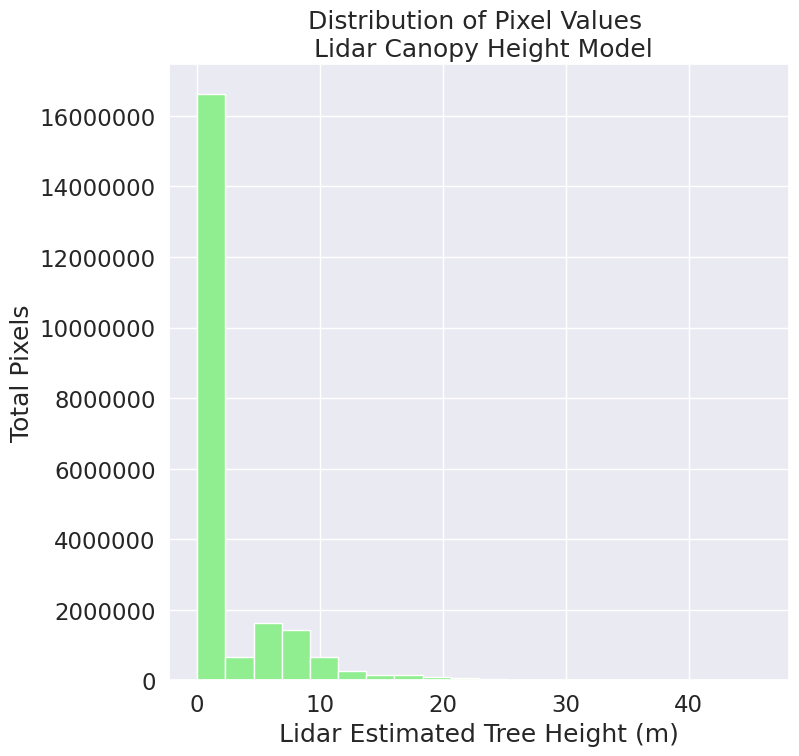

In [19]:
# histogram of with earthpy
ax = ep.hist(sjer_chm_data.values,
             figsize=(8, 8),
             colors="Lightgreen",
             xlabel="Lidar Estimated Tree Height (m)",
             ylabel="Total Pixels",
             title="Distribution of Pixel Values \n Lidar Canopy Height Model")

# Turn off scientific notation (desativar a notação científica nos rótulos dos eixos)
ax[1].ticklabel_format(useOffset=False,
                       style='plain')

#view the mean and max values of lidar
print('Mean:', sjer_chm_data.mean().values)
print('Max:', sjer_chm_data.max().values)
print('Min:', sjer_chm_data.min().values)

Mean: 8.213505
Max: 45.879997
Min: 2.0


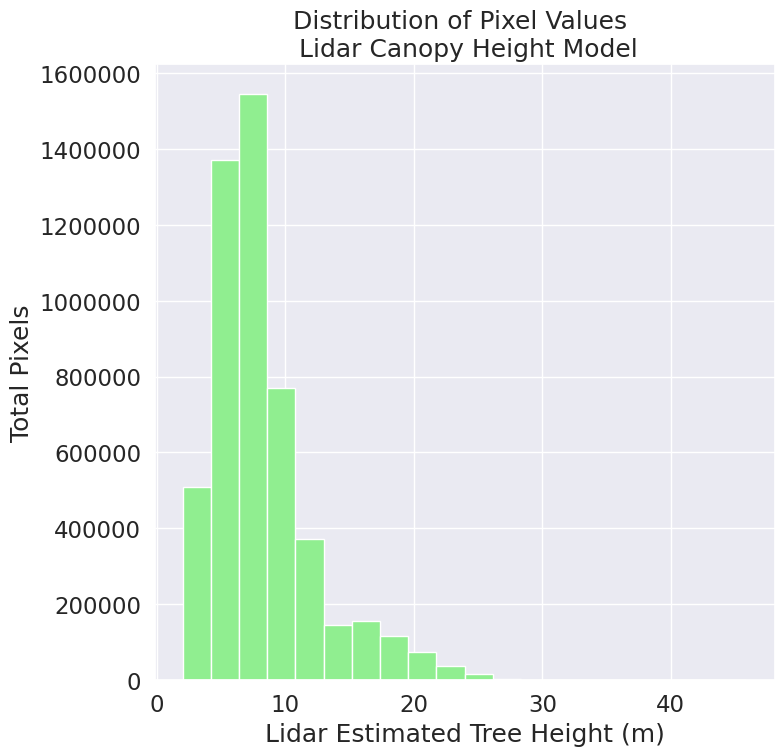

In [18]:
#removing the 0’s  with funcition where
sjer_chm_data_no_zeros = sjer_chm_data.where(sjer_chm_data != 0, np.nan)

#check
print('Mean:', sjer_chm_data_no_zeros.mean().values)
print('Max:', sjer_chm_data_no_zeros.max().values)
print('Min:', sjer_chm_data_no_zeros.min().values)

#new hist
ax = ep.hist(sjer_chm_data_no_zeros.values,
             figsize=(8, 8),
             colors="lightgreen",
             xlabel="Lidar Estimated Tree Height (m)",
             ylabel="Total Pixels",
             title="Distribution of Pixel Values \n Lidar Canopy Height Model")

# Turn off scientific notation (desativar a notação científica nos rótulos dos eixos)
ax[1].ticklabel_format(useOffset=False,
                       style='plain')

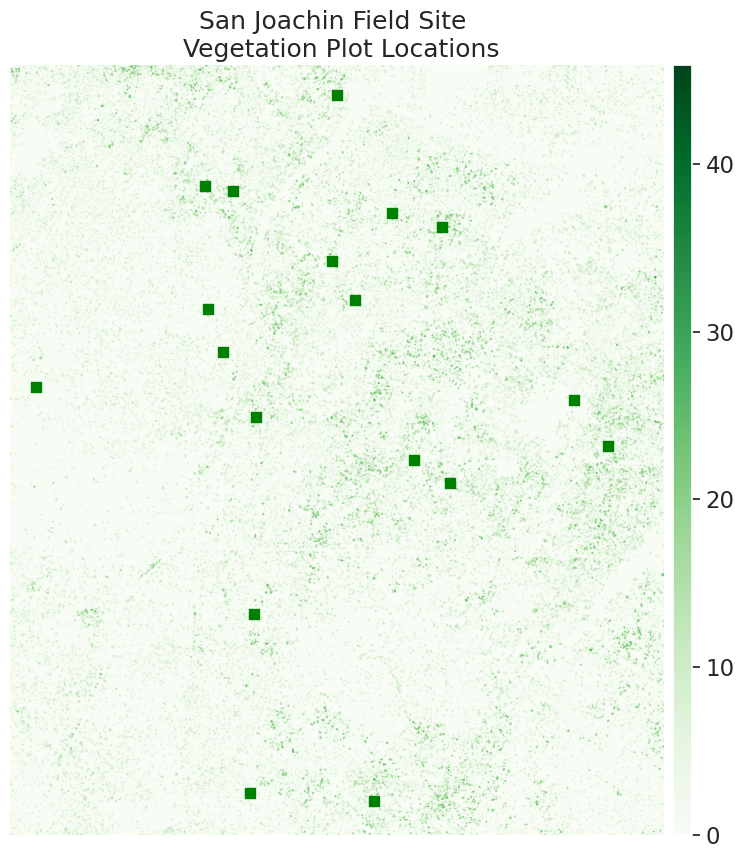

In [34]:
#Overlay Points of sjer_centroids_points into lidar

fig, ax = plt.subplots(figsize=(10, 10))

# We plot with the zeros in the data so the CHM can be better represented visually
ep.plot_bands(sjer_chm_data,
              extent = plotting_extent(sjer_chm_data,
                                       sjer_chm_data.rio.transform()), # Set spatial extent
              cmap='Greens',
              title="San Joachin Field Site \n Vegetation Plot Locations",
              scale=False,
              ax=ax)

sjer_centroids_points.plot(ax=ax,
                          marker='s',
                          markersize=45,
                          color='green')
ax.set_axis_off()
plt.show()

In [39]:
#creating a bufferaround each point
sjer_plots_poly = sjer_centroids_points.copy()

# Buffer each point using a 20 meter circle radius
# and replace the point geometry with the new buffered geometry
sjer_plots_poly['geometry'] = sjer_centroids_points.geometry.buffer(20)
sjer_plots_poly.head()

output_path = (r'/content/drive/MyDrive/python_1/spatial-vector-lidar/outputs')
# Export the buffered point layer as a shapefile to use in zonal stats
plot_buffer_path = os.path.join(output_path,
                                "plot_buffer.shp")

# save to file
sjer_plots_poly.to_file(plot_buffer_path)
sjer_plots_poly.head(6)

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,"POLYGON ((255872.376 4111567.818, 255872.280 4..."
1,SJER112,center,4111298.971,257406.967,trees,"POLYGON ((257426.967 4111298.971, 257426.871 4..."
2,SJER116,center,4110819.876,256838.760,grass,"POLYGON ((256858.760 4110819.876, 256858.664 4..."
3,SJER117,center,4108752.026,256176.947,trees,"POLYGON ((256196.947 4108752.026, 256196.851 4..."
4,SJER120,center,4110476.079,255968.372,grass,"POLYGON ((255988.372 4110476.079, 255988.276 4..."
5,SJER128,center,4111388.570,257078.867,trees,"POLYGON ((257098.867 4111388.570, 257098.771 4..."


In [43]:
#extracting pixel values for each plot
# Extract zonal stats
sjer_tree_heights = rs.zonal_stats(plot_buffer_path,
                                   sjer_chm_data_no_zeros.values,
                                   nodata=-999,
                                   affine=sjer_chm_data_no_zeros.rio.transform(),
                                   geojson_out=True,
                                   copy_properties=True,
                                   stats="count min mean max median")

# View object type
type(sjer_tree_heights)
# Turn extracted data into a pandas geodataframe
sjer_lidar_height_df = gpd.GeoDataFrame.from_features(sjer_tree_heights)
sjer_lidar_height_df.head()

,geometry,Plot_ID,Point,northing,easting,plot_type,min,max,mean,count,median
0,"POLYGON ((255872.376 4111567.818, 255872.280 4...",SJER1068,center,4111567.818,255852.376,trees,2.04,19.049999,11.544347,161,12.62
1,"POLYGON ((257426.967 4111298.971, 257426.871 4...",SJER112,center,4111298.971,257406.967,trees,2.10,24.019999,10.369277,443,7.87
2,"POLYGON ((256858.760 4110819.876, 256858.664 4...",SJER116,center,4110819.876,256838.760,grass,2.82,16.070000,7.518398,643,6.80
3,"POLYGON ((256196.947 4108752.026, 256196.851 4...",SJER117,center,4108752.026,256176.947,trees,3.24,11.059999,7.675346,245,7.93
4,"POLYGON ((255988.372 4110476.079, 255988.276 4...",SJER120,center,4110476.079,255968.372,grass,3.38,5.740000,4.591177,17,4.45


In [63]:
# SJER Data -- Import lidar chm, run zonal stats on data
# IMPORTANT: rename the calculated columns: lidar_max and lidar_mean
#Merge InSitu Data With Spatial Dataframe

#converting lidar in geodataframe
# Extract zonal stats & create geodataframe
sjer_tree_heights = rs.zonal_stats(plot_buffer_path,
                                   sjer_chm_data.values,
                                   affine=sjer_chm_data.rio.transform(),
                                   geojson_out=True,
                                   copy_properties=True,
                                   nodata=0,
                                   stats="count mean max")

# create geodataframe
sjer_lidar_height_df = gpd.GeoDataFrame.from_features(sjer_tree_heights)

# Rename columns so that we know which columns represent lidar values
sjer_lidar_height_df = sjer_lidar_height_df.rename(columns={'max': 'lidar_max',
                                                            'mean': 'lidar_mean',
                                                            'min': 'lidar_min'})

sjer_lidar_height_df.head()

#loading the insitu data
sjer_insitu_all.columns
#select onlu columns important
sjer_insitu = sjer_insitu_all[["siteid",
                               "sitename",
                               "plotid",
                               "stemheight",
                               "scientificname"]]

sjer_insitu.head()

# summarize data
insitu_stem_ht = sjer_insitu.groupby('plotid').agg(['mean','max'])['stemheight']
# view first lines
insitu_stem_ht.head()
# Rename each column
insitu_stem_ht.rename(columns={'mean': 'insitu_mean',
                               'max': 'insitu_max'},
                      inplace = True)

# view first lines
insitu_stem_ht.head()

# Join lidar and human measured tree height data
sjer_final_height = sjer_lidar_height_df.merge(insitu_stem_ht,
                                               left_on='Plot_ID',
                                               right_on='plotid')

# view first lines
sjer_final_height.head()

<ipython-input-63-5df8a4592e8a>:37: FutureWarning: ['siteid', 'sitename', 'scientificname'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  insitu_stem_ht = sjer_insitu.groupby('plotid').agg(['mean','max'])['stemheight']


,geometry,Plot_ID,Point,northing,easting,plot_type,lidar_max,lidar_mean,count,insitu_mean,insitu_max
0,"POLYGON ((255872.376 4111567.818, 255872.280 4...",SJER1068,center,4111567.818,255852.376,trees,19.049999,11.544347,161,3.866667,19.3
1,"POLYGON ((257426.967 4111298.971, 257426.871 4...",SJER112,center,4111298.971,257406.967,trees,24.019999,10.369277,443,8.221429,23.9
2,"POLYGON ((256858.760 4110819.876, 256858.664 4...",SJER116,center,4110819.876,256838.760,grass,16.070000,7.518398,643,8.218750,16.0
3,"POLYGON ((256196.947 4108752.026, 256196.851 4...",SJER117,center,4108752.026,256176.947,trees,11.059999,7.675346,245,6.512500,11.0
4,"POLYGON ((255988.372 4110476.079, 255988.276 4...",SJER120,center,4110476.079,255968.372,grass,5.740000,4.591177,17,7.600000,8.8


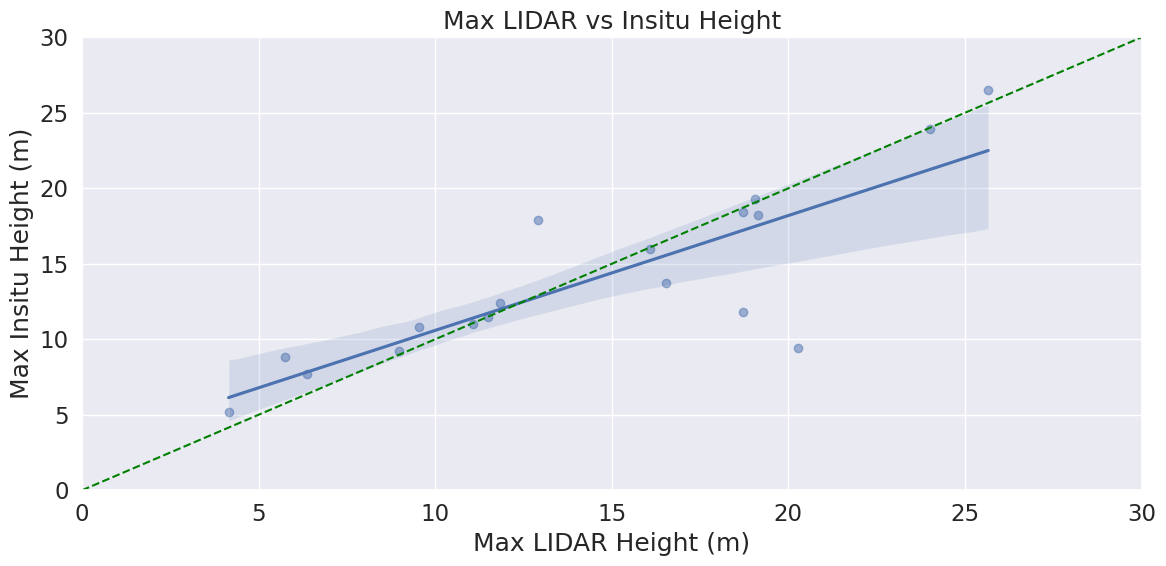

In [71]:
# Tests for figure 1 ax 1 (plot 1) - max values
# You can skip this cell!
# creating the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot 1: Max lidar vs insitu height
sns.regplot(x=sjer_final_height['lidar_max'],
            y=sjer_final_height['insitu_max'],
            ax=ax,
            scatter_kws={'alpha': 0.5})

ax.plot([0, 30], [0, 30],
        color='green',
        linestyle='--')

ax.set_xlim(0, 30)
ax.set_ylim(0, 30)
ax.set_xlabel('Max LIDAR Height (m)')
ax.set_ylabel('Max Insitu Height (m)')
ax.set_title('Max LIDAR vs Insitu Height')
plt.tight_layout()
plt.show()

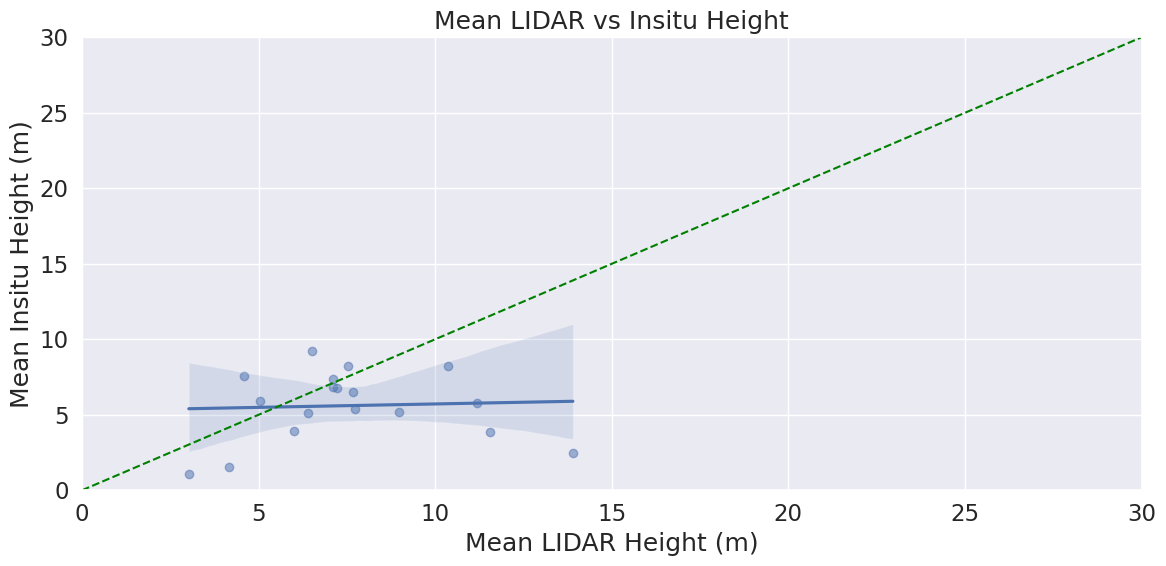

In [72]:
# Tests for figure 1 ax 2 (plot 2) - mean values
# You can skip this cell!
# Plot 2: Mean lidar vs insitu height]
# creating the figure
fig, ax = plt.subplots(figsize=(12, 6))
sns.regplot(x=sjer_final_height['lidar_mean'],
            y=sjer_final_height['insitu_mean'],
            ax=ax,
            scatter_kws={'alpha': 0.5})

ax.plot([0, 30], [0, 30],
        color='green',
        linestyle='--')

ax.set_xlim(0, 30)
ax.set_ylim(0, 30)
ax.set_xlabel('Mean LIDAR Height (m)')
ax.set_ylabel('Mean Insitu Height (m)')
ax.set_title('Mean LIDAR vs Insitu Height')

plt.tight_layout()
plt.show()

## Figure 2: Plots 3 & 4 - SOAP Lidar vs Insitu Comparison Plots (15 points for each subplot)

You will use the following SOAP data for this figure:
* `spatial-vector-lidar/california/neon-soap-site/2013/insitu/veg-structure/D17_2013_SOAP_vegStr.csv`
* `spatial-vector-lidar/california/neon-soap-site/vector_data/SOAP_centroids.shp`

Create a figure with 2 subplots for the NEON Soaproot Saddle (SOAP) field site.
* Plot 1 should show **max** lidar vs insitu height with lidar on the x axis and insitu height on the y axis.
* Plot 2 should show **mean** lidar vs insitu height with lidar on the x axis and insitu height on the y axis.

For each plot:

1. Set the x and y lims to be the same range using `xlim=` and `ylim=`:
    * `(0, 140)` for the SOAP Max height plot.
    * `(0, 40)` for the SOAP Mean height plot.
2. Add a title that includes the field site name and the measurement being displayed (max or min height).
3. Add a 1:1 line to each plot.
4. Add a regression line using `sns.regplot()`

To create this plot, you will need to calculate a summary data frame for each site that contains lidar mean and max values and insitu (measured on the ground by humans) mean and max values.

**HINT**: the SOAP data have some inconsistencies in the column headings. One way to fix this is to use the syntax:

`"text-to-append-to-column" + dataframe_name["column-name-here"]`

In [4]:
# Import SOAP plot locations & insitu data & lidar

# YOUR CODE HERE
#paths
D17_2013_SOAP_vegStr_path = (r'/content/drive/MyDrive/python_1/spatial-vector-lidar/california/neon-soap-site/2013/insitu/veg-structure/D17_2013_SOAP_vegStr.csv')
SOAP_centroids_path = (r'/content/drive/MyDrive/python_1/spatial-vector-lidar/california/neon-soap-site/vector_data/SOAP_centroids.shp')
SOAP_lidarCHM_path = (r'/content/drive/MyDrive/python_1/spatial-vector-lidar/california/neon-soap-site/2013/lidar/SOAP_lidarCHM.tif')

# open  the datas
soap_chm_data = rxr.open_rasterio(SOAP_lidarCHM_path,
                                  masked = True).squeeze()

soap_centroids_points = gpd.read_file(SOAP_centroids_path)

soap_insitu_all = pd.read_csv(D17_2013_SOAP_vegStr_path)

Mean: 10.309122
Max: 68.83
Min: 0.0


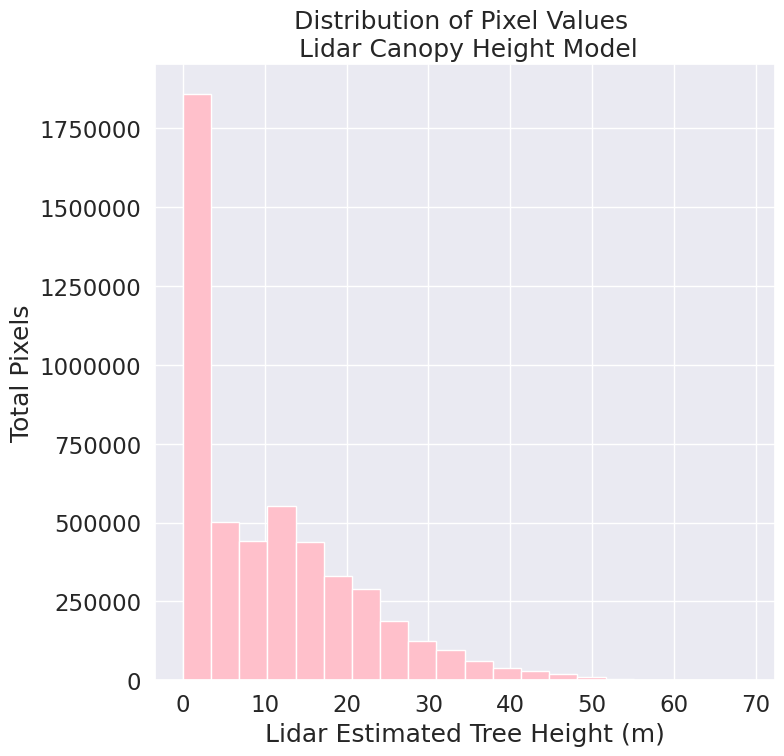

In [17]:
# histogram of with earthpy
ax = ep.hist(soap_chm_data.values,
             figsize=(8, 8),
             colors="pink",
             xlabel="Lidar Estimated Tree Height (m)",
             ylabel="Total Pixels",
             title="Distribution of Pixel Values \n Lidar Canopy Height Model")

# Turn off scientific notation (desativar a notação científica nos rótulos dos eixos)
ax[1].ticklabel_format(useOffset=False,
                       style='plain')

#view the mean and max values of lidar
print('Mean:', soap_chm_data.mean().values)
print('Max:', soap_chm_data.max().values)
print('Min:', soap_chm_data.min().values)

Mean: 15.372706
Max: 68.83
Min: 2.0


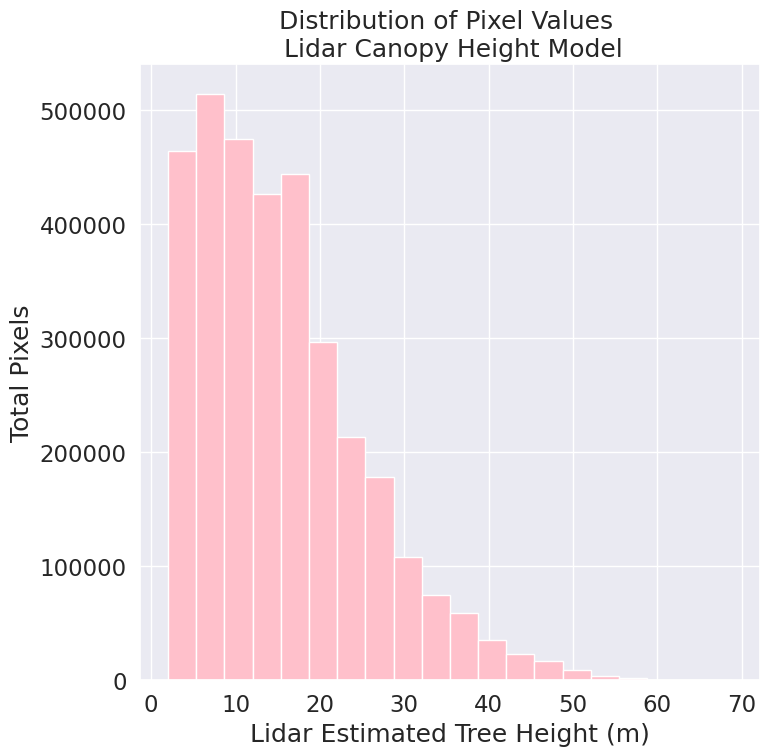

In [16]:
#removing the 0’s  with funcition where
soap_chm_data_no_zeros = soap_chm_data.where(soap_chm_data != 0, np.nan)

#check
print('Mean:', soap_chm_data_no_zeros.mean().values)
print('Max:', soap_chm_data_no_zeros.max().values)
print('Min:', soap_chm_data_no_zeros.min().values)

#new hist
ax = ep.hist(soap_chm_data_no_zeros.values,
             figsize=(8, 8),
             colors="pink",
             xlabel="Lidar Estimated Tree Height (m)",
             ylabel="Total Pixels",
             title="Distribution of Pixel Values \n Lidar Canopy Height Model")

# Turn off scientific notation (desativar a notação científica nos rótulos dos eixos)
ax[1].ticklabel_format(useOffset=False,
                       style='plain')

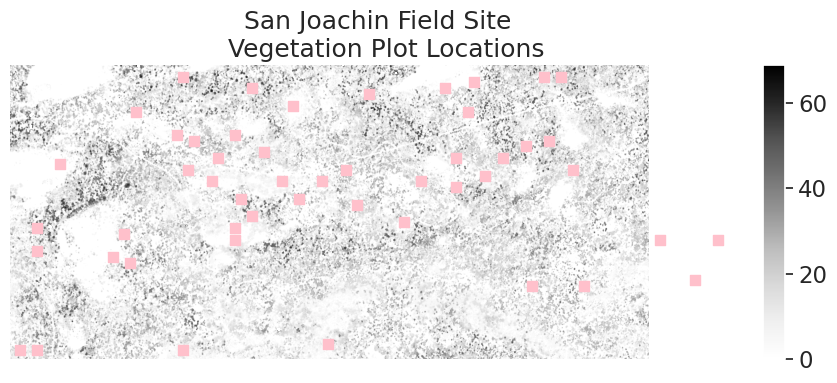

In [15]:
#Overlay Points of soap_centroids_points into lidar

fig, ax = plt.subplots(figsize=(10, 10))

# We plot with the zeros in the data so the CHM can be better represented visually
ep.plot_bands(soap_chm_data,
              extent = plotting_extent(soap_chm_data,
                                       soap_chm_data.rio.transform()), # Set spatial extent
              cmap='Greys',
              title="San Joachin Field Site \n Vegetation Plot Locations",
              scale=False,
              ax=ax)

soap_centroids_points.plot(ax=ax,
                          marker='s',
                          markersize=45,
                          color='pink')
ax.set_axis_off()
plt.show()

In [20]:
soap_plots_poly = soap_centroids_points.copy()

# Buffer each point using a 20 meter circle radius
# and replace the point geometry with the new buffered geometry
soap_plots_poly['geometry'] = soap_centroids_points.geometry.buffer(20)
soap_plots_poly.head()

output_path = (r'/content/drive/MyDrive/python_1/spatial-vector-lidar/outputs')
# Export the buffered point layer as a shapefile to use in zonal stats
plot_buffer_path = os.path.join(output_path,
                                "plot_buffer.shp")

# save to file
soap_plots_poly.to_file(plot_buffer_path)
soap_plots_poly.head(6)

,OBJECTID,ID,plotType,subtype,plotDimens,Protocols,geometry
0,1,27,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...","POLYGON ((297815.197 4101493.028, 297815.101 4..."
1,2,43,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...","POLYGON ((297065.197 4100713.028, 297065.101 4..."
2,3,63,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...","POLYGON ((299825.197 4101013.028, 299825.101 4..."
3,4,91,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...","POLYGON ((298175.197 4101433.028, 298175.101 4..."
4,5,95,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...","POLYGON ((298715.197 4100833.028, 298715.101 4..."
5,6,139,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...","POLYGON ((297065.197 4100083.028, 297065.101 4..."


In [24]:
# SOAP Data -- Import lidar chm, run zonal stats on data
# IMPORTANT: rename the calculated columns: lidar_max and lidar_mean

# YOUR CODE HERE
#extracting pixel values for each plot
# Extract zonal stats
soap_tree_heights = rs.zonal_stats(plot_buffer_path,
                                   soap_chm_data_no_zeros.values,
                                   nodata=-999,
                                   affine=soap_chm_data_no_zeros.rio.transform(),
                                   geojson_out=True,
                                   copy_properties=True,
                                   stats="count min mean max median")

# View object type
type(soap_tree_heights)
# Turn extracted data into a pandas geodataframe
soap_lidar_height_df = gpd.GeoDataFrame.from_features(soap_tree_heights)
soap_lidar_height_df.head()

,geometry,OBJECTID,ID,plotType,subtype,plotDimens,Protocols,min,max,mean,count,median
0,"POLYGON ((297815.197 4101493.028, 297815.101 4...",1,27,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",2.05,50.250000,20.455827,822,19.674999
1,"POLYGON ((297065.197 4100713.028, 297065.101 4...",2,43,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",2.20,54.099998,19.804080,1000,14.170000
2,"POLYGON ((299825.197 4101013.028, 299825.101 4...",3,63,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",2.64,32.480000,16.989834,1082,17.110001
3,"POLYGON ((298175.197 4101433.028, 298175.101 4...",4,91,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",2.06,50.309998,21.980976,1075,22.340000
4,"POLYGON ((298715.197 4100833.028, 298715.101 4...",5,95,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",3.83,33.869999,17.412048,1138,17.044998


In [36]:
# SOAP -- Calculate mean and max from insitu data (csv file), rename columns
# IMPORTANT: rename the calculated columns: insitu_max, insitu_mean
# IMPORTANT: name your joined dataframe: soap_lidar_insitu

# YOUR CODE HERE
#converting lidar in geodataframe
# Extract zonal stats & create geodataframe
soap_tree_heights = rs.zonal_stats(plot_buffer_path,
                                   soap_chm_data.values,
                                   affine=soap_chm_data.rio.transform(),
                                   geojson_out=True,
                                   copy_properties=True,
                                   nodata=0,
                                   stats="count mean max")

# create geodataframe
soap_lidar_height_df = gpd.GeoDataFrame.from_features(soap_tree_heights)

# Rename columns so that we know which columns represent lidar values
soap_lidar_height_df = soap_lidar_height_df.rename(columns={'max': 'lidar_max',
                                                            'mean': 'lidar_mean',
                                                            'min': 'lidar_min'})

soap_lidar_height_df.head()
soap_lidar_height_df['ID'] = "SOAP" + soap_lidar_height_df['ID'].astype(str)
#loading the insitu data
soap_insitu_all.columns
#select onlu columns important
soap_insitu = soap_insitu_all[["siteid",
                               "sitename",
                               "plotid",
                               "stemheight",
                               "scientificname"]]

soap_insitu.head()

# summarize data
insitu_stem_ht = soap_insitu.groupby('plotid').agg(['mean','max'])['stemheight']
# view first lines
insitu_stem_ht.head()
# Rename each column
insitu_stem_ht.rename(columns={'mean': 'insitu_mean',
                               'max': 'insitu_max'},
                      inplace = True)
insitu_stem_ht = insitu_stem_ht.reset_index()
# view first lines
insitu_stem_ht.head()

# Join lidar and human measured tree height data
soap_lidar_insitu = soap_lidar_height_df.merge(insitu_stem_ht,
                                               left_on='ID',
                                               right_on='plotid')

# view first lines
soap_lidar_insitu.head(10)

<ipython-input-36-fa2e2b6f484e>:38: FutureWarning: ['siteid', 'sitename', 'scientificname'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  insitu_stem_ht = soap_insitu.groupby('plotid').agg(['mean','max'])['stemheight']


,geometry,OBJECTID,ID,plotType,subtype,plotDimens,Protocols,lidar_max,lidar_mean,count,plotid,insitu_mean,insitu_max
0,"POLYGON ((297065.197 4100713.028, 297065.101 4...",2,SOAP43,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",54.099998,19.804080,1000,SOAP43,5.047000,51.1
1,"POLYGON ((299825.197 4101013.028, 299825.101 4...",3,SOAP63,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",32.480000,16.989834,1082,SOAP63,9.232787,33.0
2,"POLYGON ((298715.197 4100833.028, 298715.101 4...",5,SOAP95,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",33.869999,17.412048,1138,SOAP95,6.050943,28.1
3,"POLYGON ((297065.197 4100083.028, 297065.101 4...",6,SOAP139,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",49.919998,19.417840,1094,SOAP139,4.745902,120.0
4,"POLYGON ((299885.197 4100413.028, 299885.101 4...",7,SOAP143,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",27.340000,10.454653,778,SOAP143,2.530702,19.7
5,"POLYGON ((297545.197 4100533.028, 297545.101 4...",8,SOAP187,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",47.959999,22.895033,1035,SOAP187,4.878947,134.0
6,"POLYGON ((297515.197 4100683.028, 297515.101 4...",10,SOAP299,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",34.189999,18.852112,1113,SOAP299,13.896154,33.1
7,"POLYGON ((297065.197 4100593.028, 297065.101 4...",11,SOAP331,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",45.500000,18.149803,907,SOAP331,5.009848,39.2
8,"POLYGON ((299315.197 4101463.028, 299315.101 4...",23,SOAP223,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",13.469999,6.155488,410,SOAP223,2.444186,8.2
9,"POLYGON ((297785.197 4101193.028, 297785.101 4...",24,SOAP283,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",19.369999,5.781789,475,SOAP283,3.328571,13.8


In [ ]:
# Plot 3 & 4 - SOAP max and mean - plot code only in this cell

# YOUR CODE HERE


### DO NOT REMOVE LINE BELOW ###
plot02_soap_max_v_mean = nb.convert_axes(plt, which_axes="all")

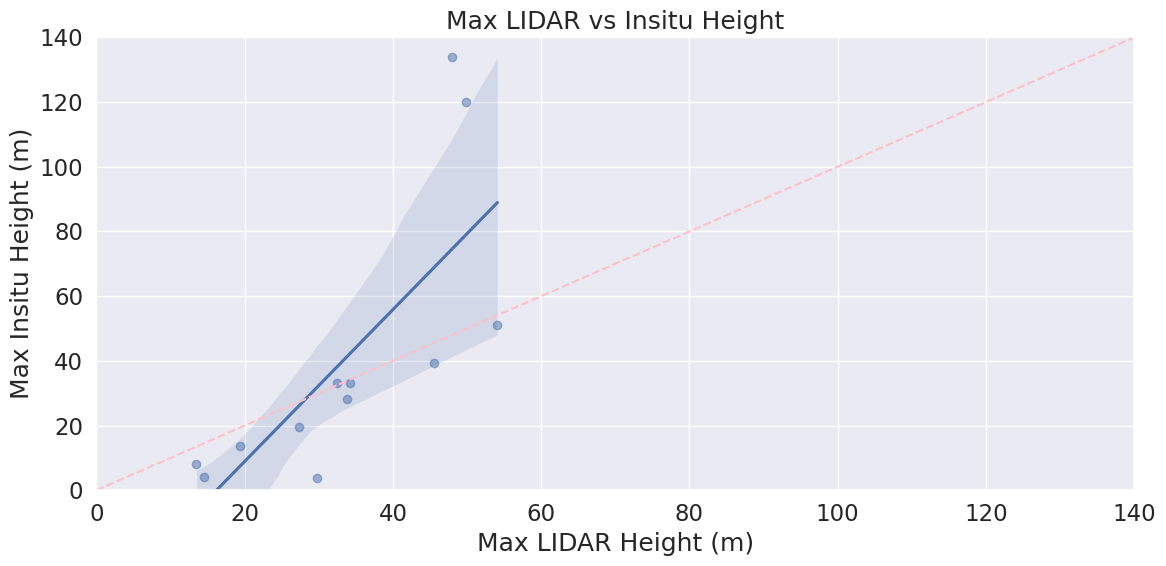

In [41]:
# Figure 2, Subplot 1 Tests - SOAP max
# You can skip this cell!

# Tests for figure 1 ax 1 (plot 1) - max values
# You can skip this cell!
# creating the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot 1: Max lidar vs insitu height
sns.regplot(x=soap_lidar_insitu['lidar_max'],
            y=soap_lidar_insitu['insitu_max'],
            ax=ax,
            scatter_kws={'alpha': 0.5})

ax.plot([0, 140], [0, 140],
        color='pink',
        linestyle='--')

ax.set_xlim(0, 140)
ax.set_ylim(0, 140)
ax.set_xlabel('Max LIDAR Height (m)')
ax.set_ylabel('Max Insitu Height (m)')
ax.set_title('Max LIDAR vs Insitu Height')
plt.tight_layout()
plt.show()

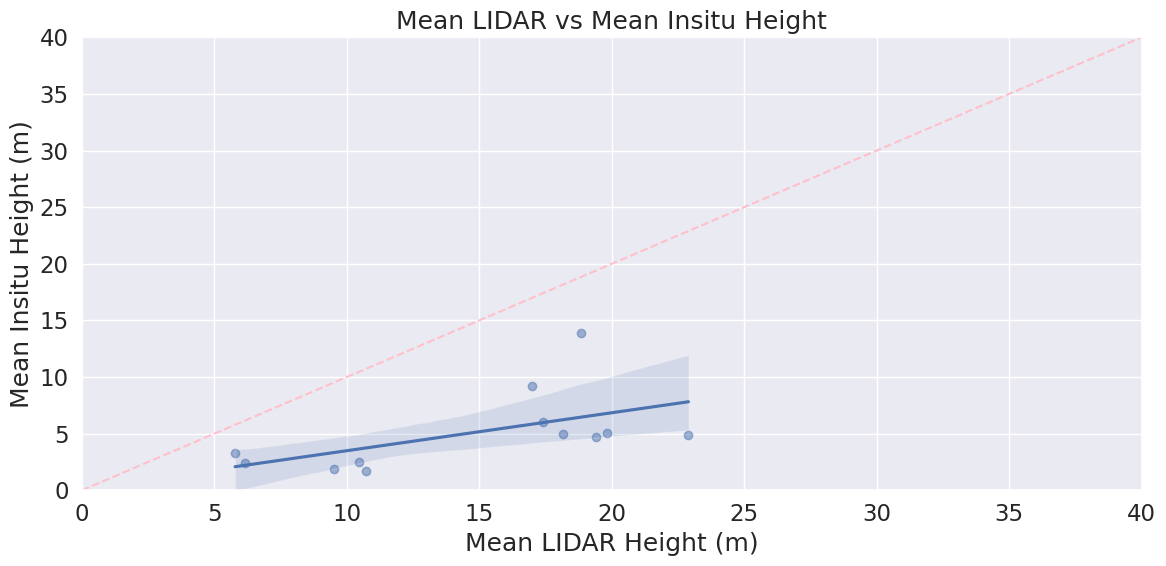

In [45]:
# Figure 2, Subplot 2 Tests - SOAP mean
# You can skip this cell!
# You can skip this cell!
# creating the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot 1: Max lidar vs insitu height
sns.regplot(x=soap_lidar_insitu['lidar_mean'],
            y=soap_lidar_insitu['insitu_mean'],
            ax=ax,
            scatter_kws={'alpha': 0.5})

ax.plot([0, 40], [0, 40],
        color='pink',
        linestyle='--')

ax.set_xlim(0, 40)
ax.set_ylim(0, 40)
ax.set_xlabel('Mean LIDAR Height (m)')
ax.set_ylabel('Mean Insitu Height (m)')
ax.set_title('Mean LIDAR vs Mean Insitu Height')
plt.tight_layout()
plt.show()

![Colored Bar](https://github.com/earthlab-education/ea-python-2020-04-lidar-uncertainty-template/blob/master/colored-bar.png?raw=1)

## Question 1 Figure One: SJER mean vs max height -- Plots 1 and 2 Interpretation
In the markdown cell below, answer the following questions:

1. Looking at the plots above, which metric: mean or max height, has a stronger relationship or is closer to a one:one relationship?
2. List one reason why mean or max (whatever you answered for question 1 above) has a stronger relationship.

You answers can be brief -- a single word or sentence or two is fine.

- A metrica de max height apresentou uma forte relacao em comparação com a media.


![Colored Bar](https://github.com/earthlab-education/ea-python-2020-04-lidar-uncertainty-template/blob/master/colored-bar.png?raw=1)


## Question 2. Of all four relationships that you plotted above, which site (SOAP or SJER) and metric (mean or max height) showed the strongest relationship?

**A strong relationship is one that is closer to 1:1 in this case.**

Add your answer in the markdown cell below. It can be short - 2-5 sentences. You do not need to perform any additional calculations. Consider the readings and the data and suggest why a particular metric might have a strong relationship.

- A metrica de comprimento maximo para o SJER.

![Colored Bar](https://github.com/earthlab-education/ea-python-2020-04-lidar-uncertainty-template/blob/master/colored-bar.png?raw=1)

## Question 3. List 2 reasons why lidar max height values may be larger than human measurements.

Add your answer to the markdown cell below.

YOUR ANSWER HERE

![Colored Bar](https://github.com/earthlab-education/ea-python-2020-04-lidar-uncertainty-template/blob/master/colored-bar.png?raw=1)

## Question 4. List 2 systematic sources of error could impact differences between lidar and measured tree height values ( 5 points)

Add your answer in the markdown cell below.

- Erros sistematicos: calibrção do instrumento eou posicionamento continuamente incorreto do aparelho de medição


![Colored Bar](https://github.com/earthlab-education/ea-python-2020-04-lidar-uncertainty-template/blob/master/colored-bar.png?raw=1)

## Question 5. List 2 random sources of error that could impact differences between lidar and measured tree height values.  (5 points)

Add your answer to the markdown cell below. Note that you can provide sources of random error for lidar OR insitu measurements. You only need two total examples.

- Erros aleatorios: ruido nas medidas e perde de sensibilidade na medida do equipamento

![Colored Bar](https://github.com/earthlab-education/ea-python-2020-04-lidar-uncertainty-template/blob/master/colored-bar.png?raw=1)